### Тестовое задание. Задача 3

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline

#импортируем библиотеки

In [81]:
data = pd.read_csv('dataset 3.xlsx - Лист1.csv') #читаем файл, сохранила его в csv
data

,order_id,date,product,category,price,quantity,customer_id,city
0,1001,3/1/2024,Ноутбук,Электроника,33750,1,501,Санкт-Петербург
1,1002,3/2/2024,Смарфтон,Электроника,15789,2,502,Москва
2,1003,3/3/2024,ТВ,Электроника,1200,1,503,Нижний Новгород
3,1004,3/4/2024,Стул,Мебель,1699,4,504,Владивосток
4,1005,3/4/2024,Ноутбук,Электроника,89999,1,503,Нижний Новгород
5,1006,3/4/2024,Ноутбук,Электроника,122999,2,504,Москва
6,1007,3/5/2024,Планшет,Электроника,17599,1,505,Нижний Новгород
7,1008,3/6/2024,Стиральная машина,Бытовая техника,37599,1,506,Самара
8,1009,3/6/2024,Газовая плита,Бытовая техника,33799,2,507,Санкт-Петербург


In [82]:
data.dtypes #проверяем типы данных

order_id        int64
date           object
product        object
category       object
price           int64
quantity        int64
customer_id     int64
city           object
dtype: object

In [83]:
data.date = pd.to_datetime(data.date) #лучше колонку с датой преобразовать в соотв. тип

In [84]:
data.dtypes

order_id                int64
date           datetime64[ns]
product                object
category               object
price                   int64
quantity                int64
customer_id             int64
city                   object
dtype: object

Какой общий объём продаж по всему датасету?

In [11]:
print(f"Общий объем продаж составил: {sum(data.price * data.quantity)} рублей.")

Общий объем продаж составил: 532117 рублей.


Какая средняя цена товара в каждой категории?

In [17]:
data.groupby('category', as_index=False).agg({'price': 'mean'}).round(2)
#группируем по категории, с помощью функции agg считаем среднюю цену для каждой категории и округляем знач. до 2 знаков 

,category,price
0,Бытовая техника,35699.00
1,Мебель,1699.00
2,Электроника,46889.33


In [33]:
print("""
Средняя цена товара в категории Бытовая техника составила 35699.00.
Средняя цена товара в категории Мебель составила 1699.00.
Средняя цена товара в категории Электроника составила 46889.33.""")


Средняя цена товара в категории Бытовая техника составила 35699.00.
Средняя цена товара в категории Мебель составила 1699.00.
Средняя цена товара в категории Электроника составила 46889.33.


Сколько уникальных клиентов совершили покупки?

In [87]:
data.customer_id.nunique() #функция nunique() считает кол-во уникальных значений

7

In [43]:
print(f"{data.customer_id.nunique()} уникальных пользователей совершили покупки.")

7 уникальных пользователей совершили покупки.


В каком городе больше было всего заказов?

In [48]:
data.groupby('city', as_index=False).agg({'order_id' : 'count'}).sort_values('order_id', ascending=False)
#группируем по городу, убираем город из индекса, функцией agg считаем кол-во заказов, сортируем по убыванию 

,city,order_id
2,Нижний Новгород,3
1,Москва,2
4,Санкт-Петербург,2
0,Владивосток,1
3,Самара,1


In [51]:
print(f"Больше всего заказов было сделано в Нижнем Новгороде.")

Больше всего заказов было сделано в Нижнем Новгороде.


Какую категорию товаров покупали чаще всего?

In [88]:
data.category.value_counts() #считаем кол-во повторений значения в колонке с помощью value_counts()

Электроника        6
Бытовая техника    2
Мебель             1
Name: category, dtype: int64

In [56]:
print(f"Чаще всего покупали товары из категории Электроника.")

Чаще всего покупали товары из категории Электроника.


Text(0, 0.5, 'Количество продаж')

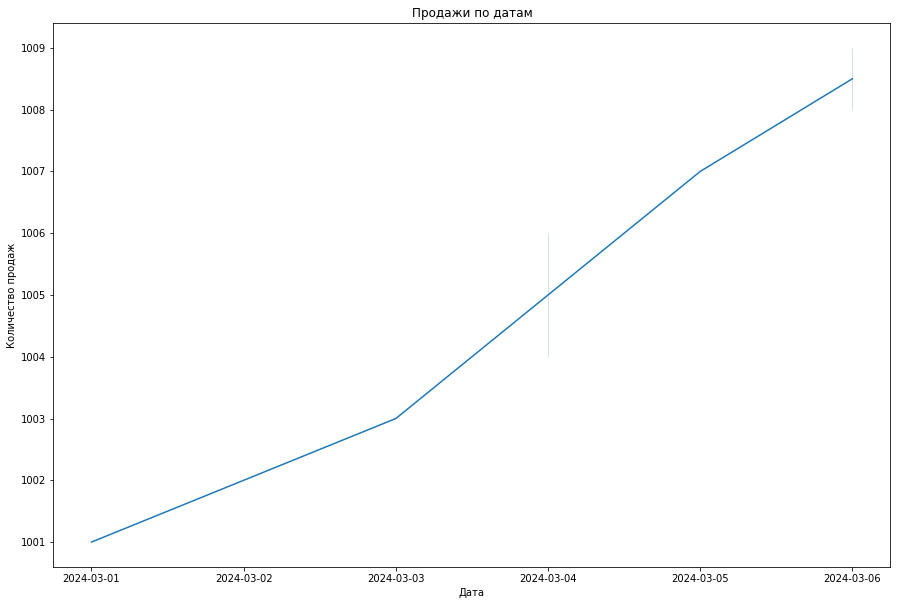

In [86]:
plt.figure(figsize=(15, 10)) #делаем сам график по размеру чуть больше

sns.lineplot(data = data, x = 'date', y = 'order_id') #строим график
plt.title('Продажи по датам') #добавляем заголовок
plt.xlabel('Дата') #добавляем подпись по оси Х
plt.ylabel('Количество продаж') #добавляем подпись по оси Y